In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import joblib


In [2]:
df = pd.read_csv("../data/marketing_campaign.csv", sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
print(df.shape)
print(df.columns.tolist())


(2240, 29)
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [4]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
print(df.columns.tolist())



['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [7]:
from datetime import datetime

current_year = datetime.now().year
df["Age"] = current_year - df["Year_Birth"]


In [8]:
spending_cols = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

df["Total_Spending"] = df[spending_cols].sum(axis=1)


In [9]:
df[["Income", "Age", "Total_Spending", "Recency"]].head()


,Income,Age,Total_Spending,Recency
0,58138.0,68,1617,58
1,46344.0,71,27,38
2,71613.0,60,776,26
3,26646.0,41,53,26
4,58293.0,44,422,94


In [10]:
final_features = ["Income", "Age", "Total_Spending", "Recency"]
X = df[final_features].copy()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
import joblib
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters


In [14]:
joblib.dump(kmeans, "../models/customer_segmentation.pkl")


['../models/customer_segmentation.pkl']

In [15]:
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


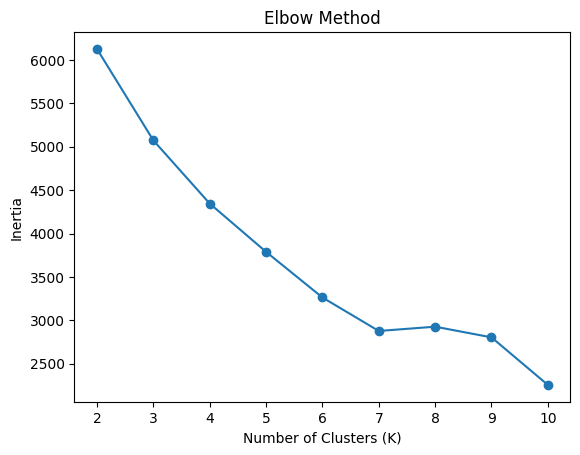

In [16]:
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [17]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.259905168078706


In [18]:
cluster_summary = df.groupby("Cluster")[final_features].mean()
cluster_summary


,Income,Age,Total_Spending,Recency
Cluster,,,,
0,34658.424191,49.177172,159.846678,26.744463
1,76910.344633,52.374765,1403.606403,56.384181
2,39972.582508,55.580858,220.856436,77.455446
3,61733.000000,69.378049,756.697154,32.591463


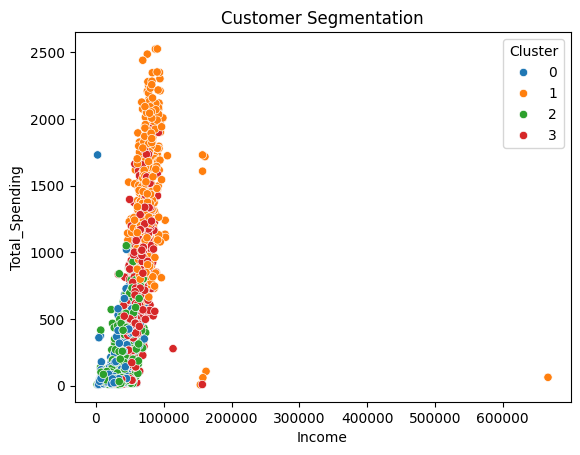

In [19]:
sns.scatterplot(
    x=df["Income"],
    y=df["Total_Spending"],
    hue=df["Cluster"],
    palette="tab10"
)
plt.title("Customer Segmentation")
plt.show()


In [20]:
df.to_csv("../data/customer_segments.csv", index=False)


In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores


{2: 0.30875729180680617,
 3: 0.2598882538410596,
 4: 0.259905168078706,
 5: 0.2623722826152358,
 6: 0.2651659518651951,
 7: 0.27047547746351414}

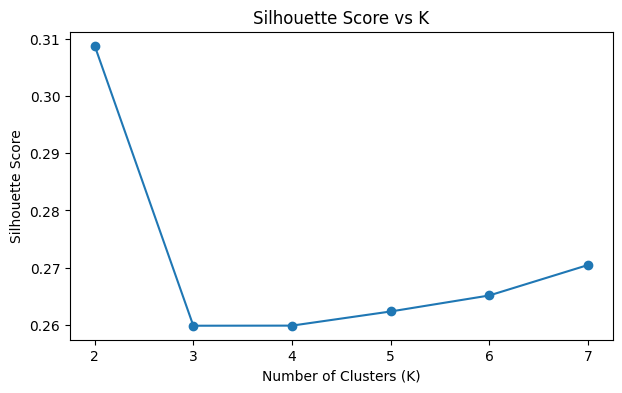

In [22]:
plt.figure(figsize=(7,4))
plt.plot(
    list(silhouette_scores.keys()),
    list(silhouette_scores.values()),
    marker="o"
)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [24]:
pca_silhouette = {}

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    pca_silhouette[k] = score

pca_silhouette


{2: 0.4118667966736337,
 3: 0.39557360338311054,
 4: 0.4061339114397207,
 5: 0.3860611467097661,
 6: 0.35882755925966053,
 7: 0.3469020868221623}

In [25]:
best_k = max(pca_silhouette, key=pca_silhouette.get)

kmeans_pca = KMeans(n_clusters=best_k, random_state=42)
pca_clusters = kmeans_pca.fit_predict(X_pca)


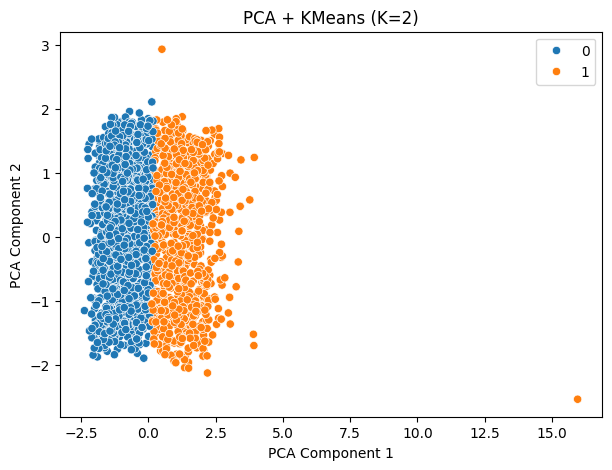

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=pca_clusters,
    palette="tab10"
)
plt.title(f"PCA + KMeans (K={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [27]:
joblib.dump(pca, "../models/pca.pkl")
joblib.dump(kmeans_pca, "../models/customer_segmentation_pca.pkl")


['../models/customer_segmentation_pca.pkl']

In [28]:
for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"K={k}, Silhouette={score:.3f}")


K=3, Silhouette=0.396
K=4, Silhouette=0.406


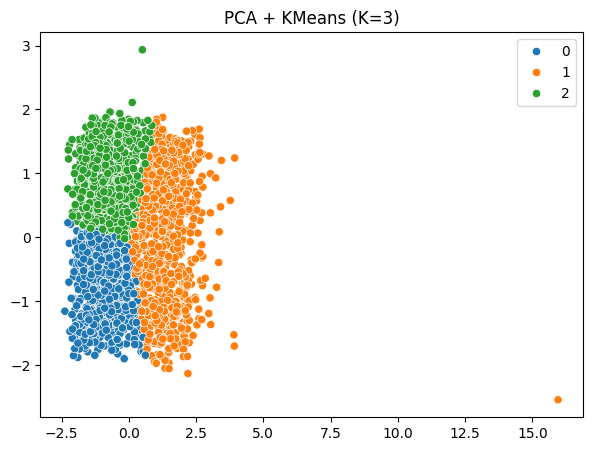

In [29]:
km3 = KMeans(n_clusters=3, random_state=42)
labels3 = km3.fit_predict(X_pca)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=labels3,
    palette="tab10"
)
plt.title("PCA + KMeans (K=3)")
plt.show()


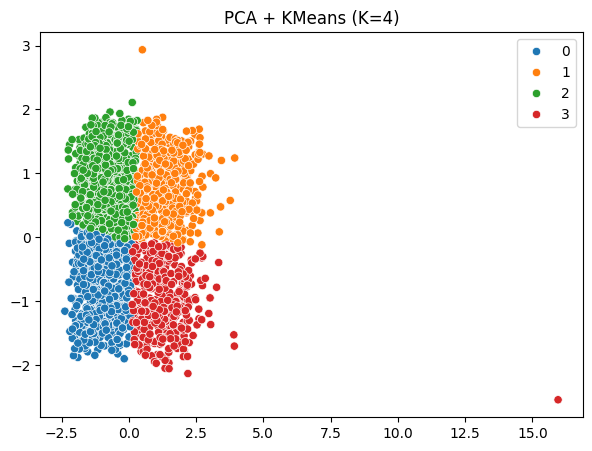

In [30]:
km4 = KMeans(n_clusters=4, random_state=42)
labels4 = km4.fit_predict(X_pca)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=labels4,
    palette="tab10"
)
plt.title("PCA + KMeans (K=4)")
plt.show()


##### PCA improved visualization and silhouette score for K=2, but produced overly coarse segmentation.
##### KMeans with K=4 on original scaled features was selected to provide richer customer segments and better business interpretability.